In [3]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

era5 = nc.Dataset("data.nc")
firstMask = era5.variables['t2m']
tempMask = np.roll(firstMask, 1800, axis=2)
latInd = np.array(pd.read_csv('latInd.csv'))
erLat = era5.variables['latitude']
erLon = era5.variables['longitude']

ds = nc.Dataset("pr_sfc_Amon_CCSM4_past1000_085001-185012.nc")
tas = nc.Dataset("tas_sfc_Amon_CCSM4_past1000_085001-185012.nc")
lat = np.array(ds.variables['lat'])
lon = np.array(ds.variables['lon'])
tempPrecip = np.array(ds.variables['pr'])
tempTemp = np.array(tas.variables['tas'])




[-90.         -90.         -90.         ... -64.55497742 -63.61256409
 -62.67015839]
300.0
[[ 64.89291569  55.22369529  60.78425144 ...  60.0790048   62.25679784
   67.37791617]
 [ 64.8700993   55.3017959   60.78781516 ...  60.07915897  62.15520682
   67.37788749]
 [ 64.86223331  55.39043708  60.78870429 ...  60.07909085  62.06212713
   67.37788749]
 ...
 [584.55853723 555.9466386  467.45007246 ... 597.19265165 550.43295931
  637.74513817]
 [666.64735423 604.9692122  543.48897477 ... 738.70585024 641.647702
  715.64715446]
 [822.28124622 736.25487357 684.98255499 ... 932.15397492 835.62529317
  919.77845583]]
[[225.78297424 227.06445312 226.97184753 ... 225.11981201 225.65739441
  226.27929688]
 [225.62904358 226.8261261  226.89277649 ... 225.12580872 225.63397217
  226.28271484]
 [225.59643555 226.81367493 226.86277771 ... 225.11961365 225.62475586
  226.27619934]
 ...
 [262.45785522 259.71884155 262.77224731 ... 260.83499146 261.46917725
  260.43182373]
 [264.52770996 261.94509888 26

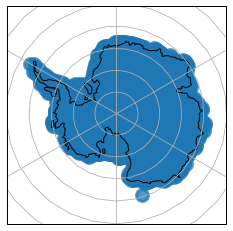

In [4]:
temp = np.zeros([1001, 192, 288])
precip = np.zeros([1001, 192, 288])

for i in range(1001):
    temp[i] = np.mean(tempTemp[i*12:(i+1)*12], axis=0)
    precip[i] = np.mean(tempPrecip[i*12:(i+1)*12], axis=0) * 31536000





tempRegrid = np.zeros([32, 3600])
secondRegrid = np.zeros([32, 7200])


i = 0
for item in latInd:
    tempRegrid[i, :] = tempMask[0, item[0]]
    i = i + 1


for i in range(32):
    secondRegrid[i, :7198] = np.dstack((tempRegrid[i, :-1], tempRegrid[i, :-1] + np.diff(tempRegrid[i]) / 2.0)).ravel()




regrid = secondRegrid[:, ::25]



latLand = np.zeros([5794])
lonLand = np.zeros([5794])
prLand = np.zeros([5794, 1001])
tasLand = np.zeros([5794, 1001])

gridCount = 0

for i in range(32):
    for j in range(288):
        if regrid[i, j] > 0:
            latLand[gridCount] = lat[i]
            lonLand[gridCount] = lon[j]
            prLand[gridCount] = precip[:, i, j]
            tasLand[gridCount] = temp[:, i, j]
            gridCount = gridCount + 1


print(latLand)
print(lonLand[-1])
print(prLand)
print(tasLand)
print(gridCount)

ax = plt.axes(projection=ccrs.SouthPolarStereo())


ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax.gridlines()

plt.rcParams['figure.figsize'] = [20, 20]



plt.scatter(lonLand, latLand, s=140, linewidth=3, alpha=0.75, vmin=0, vmax=118, zorder=1, transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

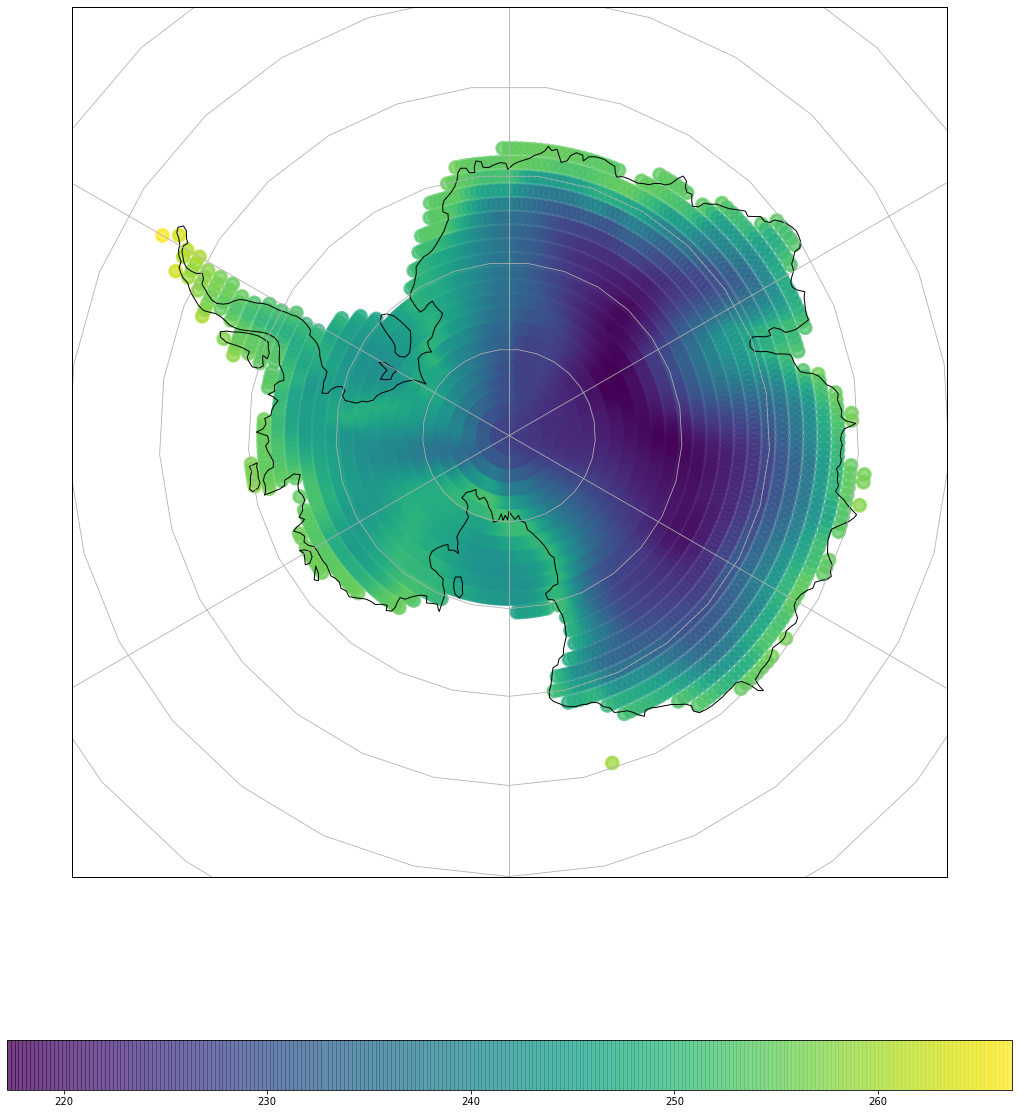

In [5]:
ax = plt.axes(projection=ccrs.SouthPolarStereo())


ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax.gridlines()

plt.rcParams['figure.figsize'] = [20, 20]



plt.scatter(lonLand, latLand, c=tasLand[:, 54], s=140, linewidth=3, alpha=0.75, zorder=1, transform=ccrs.PlateCarree())
plt.colorbar(orientation="horizontal", fraction=0.05, shrink=0.9)

ax.coastlines()

plt.show()

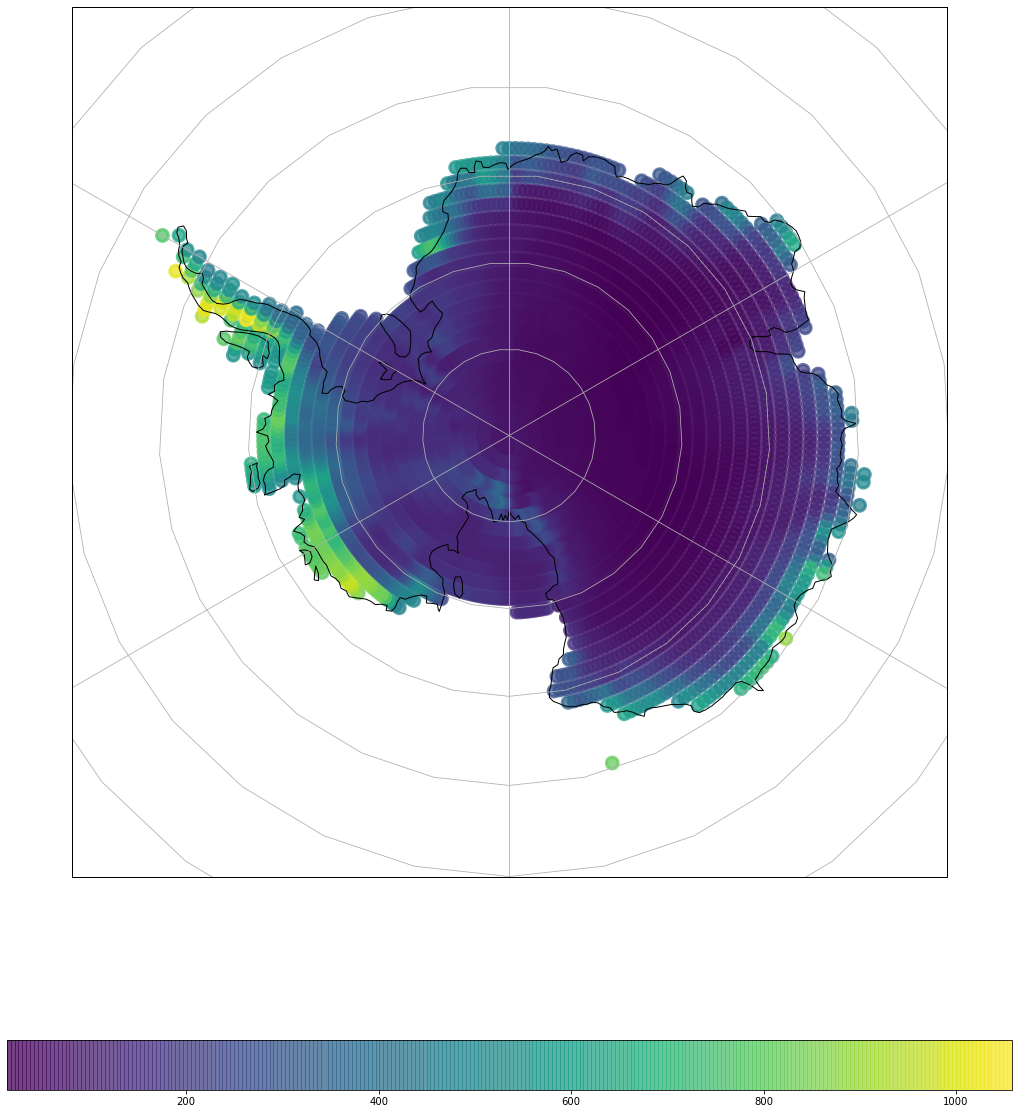

In [6]:
ax = plt.axes(projection=ccrs.SouthPolarStereo())


ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax.gridlines()

plt.rcParams['figure.figsize'] = [20, 20]



plt.scatter(lonLand, latLand, c=prLand[:, 54], s=140, linewidth=3, alpha=0.75, zorder=1, transform=ccrs.PlateCarree())
plt.colorbar(orientation="horizontal", fraction=0.05, shrink=0.9)

ax.coastlines()

plt.show()

In [7]:
np.savetxt("MMETemps.csv", tasLand)
np.savetxt("MMEPrecip.csv", prLand)

In [8]:
bothLand = np.vstack((tasLand, prLand))
print(bothLand.shape)

(11588, 1001)


In [9]:
from scipy.io import savemat
proxyDic = {"Ye": tasLand}
savemat("TempMME.mat", proxyDic)


In [10]:
print(latLand[2440])
print(lonLand[2440])

-82.46073150634766
170.0


[2351]


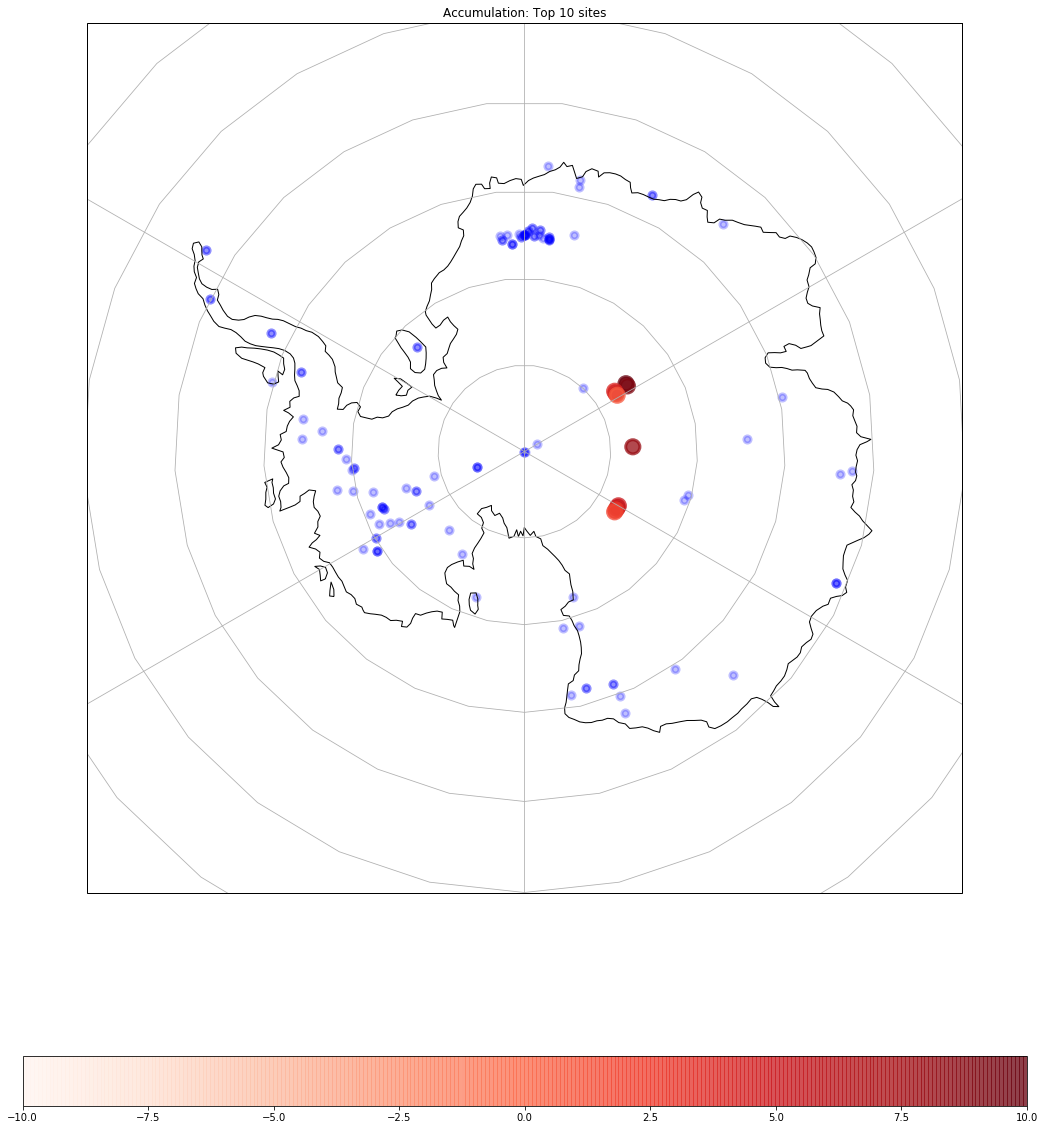

In [153]:
rank = np.array(pd.read_csv('C2.csv'))
sites = np.array(pd.read_csv('Sites.csv'))

print(rank[4])

topLats = np.zeros([10])
topLons = np.zeros([10])


#ACCUM
for i in range(10):
    topLats[i] = latLand[rank[i]-1]
    topLons[i] = lonLand[rank[i]-1]


#TEMP
"""
for i in range(8):
    topLats[i] = latLand[rank[i]-1]
    topLons[i] = lonLand[rank[i]-1]
    
for i in range(2):
    topLats[i+8] = latLand[rank[i]]
    topLons[i+8] = lonLand[rank[i]]
"""
    


t = 10 - np.arange(10)

ax = plt.axes(projection=ccrs.SouthPolarStereo())


ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax.gridlines()

plt.rcParams['figure.figsize'] = [20, 20]



plt.scatter(topLons, topLats, c=t, s=200, linewidth=3, alpha=0.75, cmap=plt.cm.Reds, vmin=-10, vmax=10, zorder=1, transform=ccrs.PlateCarree())
plt.colorbar(orientation="horizontal", fraction=0.05, shrink=0.9, cmap=plt.cm.Reds)
plt.scatter(sites[:, 1], sites[:, 0], c='blue', s=50, linewidth=3, alpha=0.25, zorder=1, transform=ccrs.PlateCarree())
#plt.colorbar(orientation="horizontal", fraction=0.05, shrink=0.9)
plt.title("Accumulation: Top 10 sites")

ax.coastlines()

plt.show()

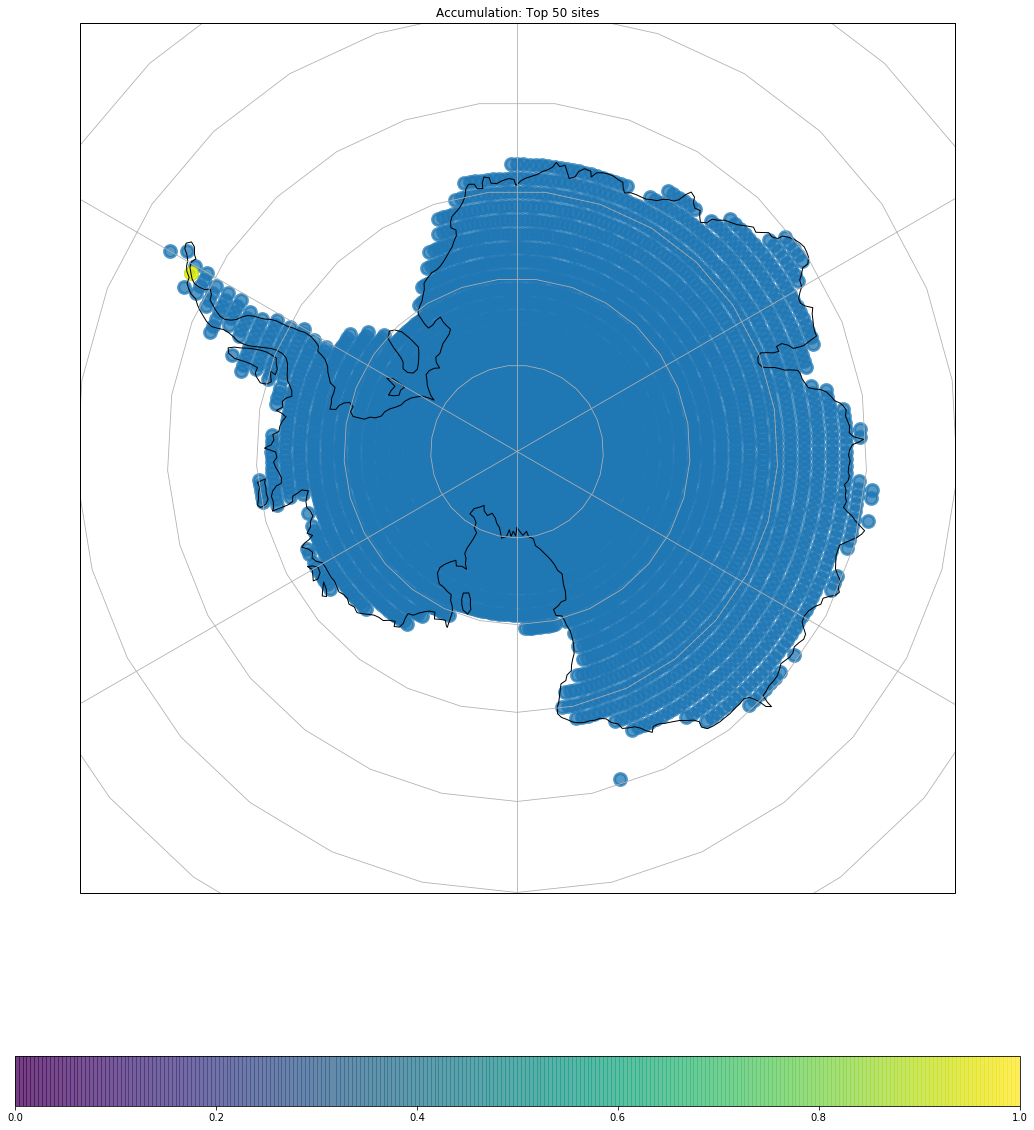

In [71]:
ax = plt.axes(projection=ccrs.SouthPolarStereo())


ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax.gridlines()

plt.rcParams['figure.figsize'] = [20, 20]

k = 5790
l = 5791


plt.scatter(lonLand, latLand, s=140, linewidth=3, alpha=0.75, cmap=plt.cm.Blues, zorder=1, transform=ccrs.PlateCarree())
plt.scatter(lonLand[k:l], latLand[k:l], c='yellow', s=140, linewidth=3, alpha=0.75, cmap=plt.cm.Blues, zorder=1, transform=ccrs.PlateCarree())
plt.colorbar(orientation="horizontal", fraction=0.05, shrink=0.9, cmap=plt.cm.Blues)
#plt.colorbar(orientation="horizontal", fraction=0.05, shrink=0.9)
plt.title("Accumulation: Top 50 sites")

ax.coastlines()

plt.show()

In [36]:
sites = np.array(pd.read_csv('Sites.csv'))
siteInd = np.zeros([118])
print(latLand)

for i in range(len(sites)):
    latDiff = np.abs(latLand - sites[i, 0])
    lonDiff = np.abs(lonLand - sites[i, 1])
    
    latMin = latLand[latDiff.argmin()]
    lonMin = lonLand[lonDiff.argmin()]
    
    intArr = np.intersect1d(np.where(latLand == latMin), np.where(lonLand == lonMin))
    
    if len(intArr) != 0:
        siteInd[i] = intArr[0]
    else:
        latDiff = np.abs(latLand - (sites[i, 0] - 1))
        latMin = latLand[latDiff.argmin()]
        intArr = np.intersect1d(np.where(latLand == latMin), np.where(lonLand == lonMin))
        if len(intArr) != 0:
            siteInd[i] = intArr[0]
        else:
            latDiff = np.abs(latLand - (sites[i, 0]))
            lonDiff = np.abs(lonLand - (sites[i, 1] - 2))
            latMin = latLand[latDiff.argmin()]
            lonMin = lonLand[lonDiff.argmin()]
    
            intArr = np.intersect1d(np.where(latLand == latMin), np.where(lonLand == lonMin))
            siteInd[i] = intArr[0]
    
    
print(siteInd)

[-90.         -90.         -90.         ... -64.55497742 -63.61256409
 -62.67015839]
[3654. 5779. 2483. 5634. 4991. 5224. 3367. 4463. 3419. 3912. 3168. 3915.
 4464.    0. 3660. 5490. 3934. 2504. 5576. 4627. 4180. 3937. 5361. 3070.
 4462. 4986. 3651. 5501. 5012. 3297. 3362. 3360. 4462. 4466. 5101. 3541.
 2304. 1354. 5767. 5481. 4467. 4465. 4462. 5166. 4835.  336. 4462. 4467.
 4632. 4667. 2761. 4467. 4464. 4235. 2794. 5155. 1762. 4462. 5490. 4180.
 5212. 4417. 3367. 4663. 3929. 4464. 5779. 4667. 4459. 4170. 3367. 5767.
 5224. 3366. 4664.    0. 4462. 4459. 4835. 4465. 1354. 4462. 4464. 4667.
 3915. 4663. 4467. 4154. 4467. 4667. 4465. 4463. 4467. 3934. 5767. 2220.
 4467. 3419. 5212. 3070. 4472. 4991. 2504. 5700. 3934. 3874. 5791. 3876.
 3912. 3912. 1354. 4986. 4532. 5791.  116. 3540. 4994. 3327.]


In [39]:
existProx = np.zeros([118, 1001])

for i in range(len(siteInd)):
    if i < 56:
        existProx[i] = prLand[int(siteInd[i])]
    else:
        existProx[i] = tasLand[int(siteInd[i])]
        
print(existProx)

[[260.09593783 243.28726984 274.43765338 ... 247.32260183 240.27292477
  202.9242698 ]
 [750.8016068  634.24480826 510.35010899 ... 746.61492082 686.67340593
  708.12328078]
 [106.38019308 138.37358564 133.20196579 ...  75.07989681  86.8283093
   74.4907291 ]
 ...
 [219.27374268 220.93714905 219.58274841 ... 220.00744629 219.38911438
  219.56730652]
 [247.93592834 248.97645569 250.04142761 ... 247.93878174 247.13191223
  247.82933044]
 [243.9342804  241.0713501  247.3625946  ... 241.42919922 242.41203308
  239.18249512]]


In [40]:
np.savetxt("ExistProxYe.csv", existProx)

In [41]:
newProxyDic = {"Ye2": existProx}
savemat("ExistProx.mat", newProxyDic)

In [77]:
# Covariance

accumMe = np.array(pd.read_csv('TrueAccumMetric.csv'))[:, 0]
tempMe = np.array(pd.read_csv('TrueTempMetric.csv'))[:, 0]

accumCov = np.zeros([5794])
tempCov = np.zeros([5794])


for i in range(5794):
    accumCov[i] = np.corrcoef(accumMe, prLand[i])[0, 1]
    tempCov[i] = np.corrcoef(tempMe, tasLand[i])[0, 1]

    
    


0.5724606867196373


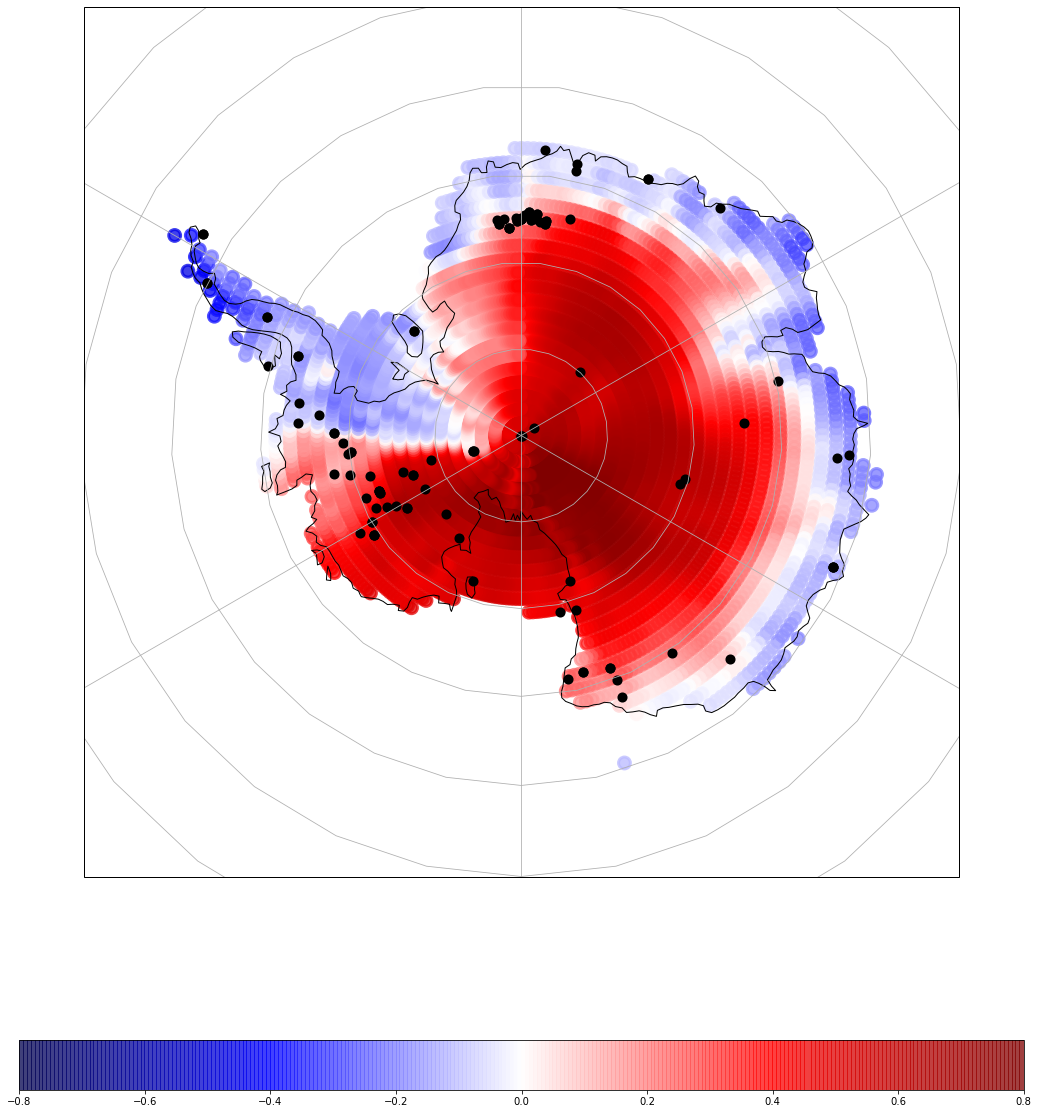

In [116]:
ax = plt.axes(projection=ccrs.SouthPolarStereo())


ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax.gridlines()

plt.rcParams['figure.figsize'] = [20, 20]



plt.scatter(lonLand, latLand, c=accumCov, cmap=plt.cm.seismic, vmin=-0.8, vmax=0.8, s=140, linewidth=3, alpha=0.75, zorder=1, transform=ccrs.PlateCarree())
plt.colorbar(orientation="horizontal", fraction=0.05, shrink=0.9)
plt.scatter(sites[:, 1], sites[:, 0], c='black', s=50, linewidth=3, alpha=1, zorder=1, transform=ccrs.PlateCarree())


ax.coastlines()

plt.show()

In [89]:
print(np.corrcoef(np.array(pd.read_csv('TrueAccumMetric.csv'))[:, 0], prLand[0]))

[[1.         0.57246069]
 [0.57246069 1.        ]]


In [84]:
print(accumMe)

[608.1968144 794.2389931 692.1120398 ... 591.5487983 529.9510288
 531.8847524]


In [95]:
print(np.corrcoef(np.sum(prLand, axis=0), prLand[0]))

# Covariance

accumCov2 = np.zeros([5794])
tempCov2 = np.zeros([5794])


for i in range(5794):
    accumCov2[i] = np.corrcoef(np.sum(prLand, axis=0), prLand[i])[0, 1]
    tempCov2[i] = np.corrcoef(np.sum(tasLand, axis=0), tasLand[i])[0, 1]

    
    


[[1.         0.65219574]
 [0.65219574 1.        ]]


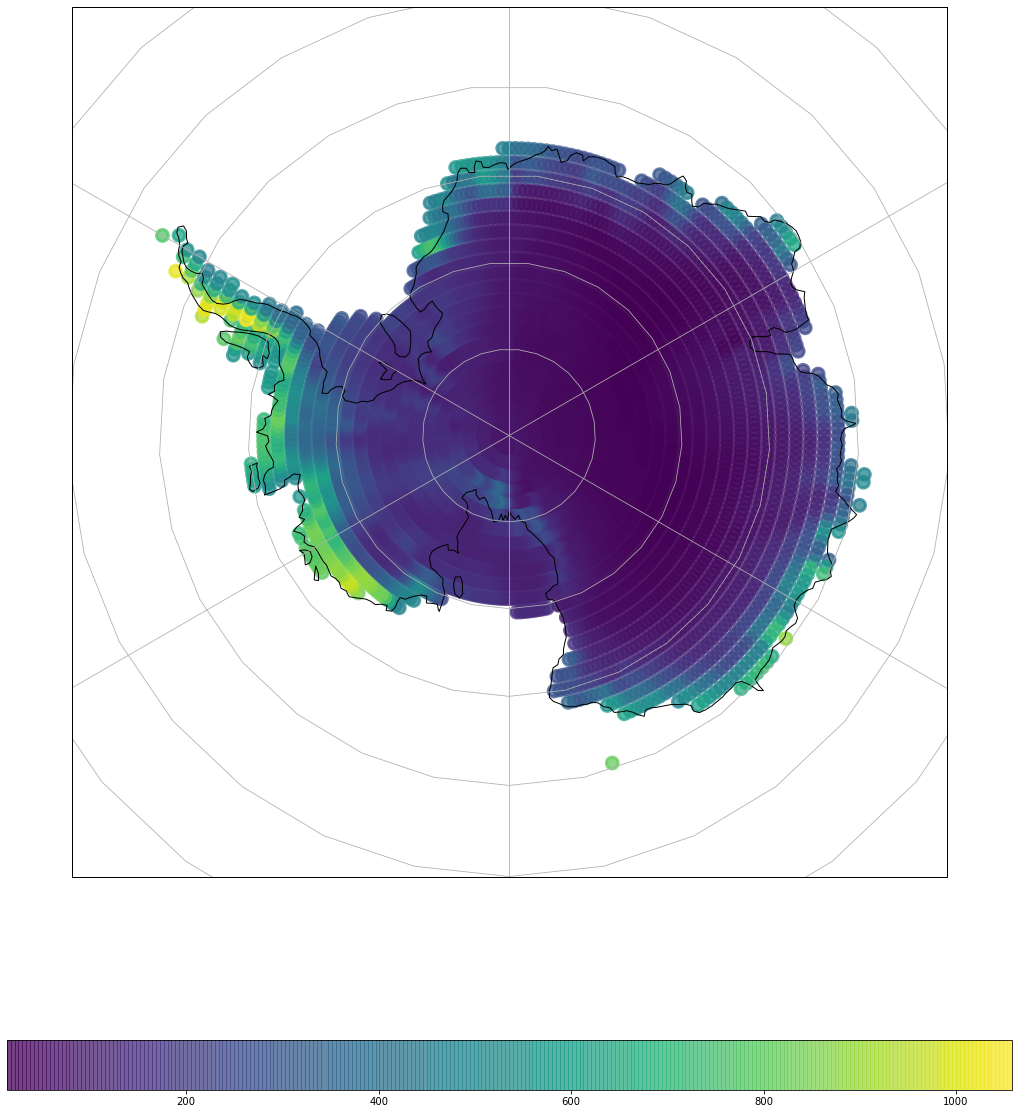

In [99]:
ax = plt.axes(projection=ccrs.SouthPolarStereo())


ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax.gridlines()

plt.rcParams['figure.figsize'] = [20, 20]



plt.scatter(lonLand, latLand, c=prLand[:, 54], s=140, linewidth=3, alpha=0.75, zorder=1, transform=ccrs.PlateCarree())
plt.colorbar(orientation="horizontal", fraction=0.05, shrink=0.9)

ax.coastlines()

plt.show()

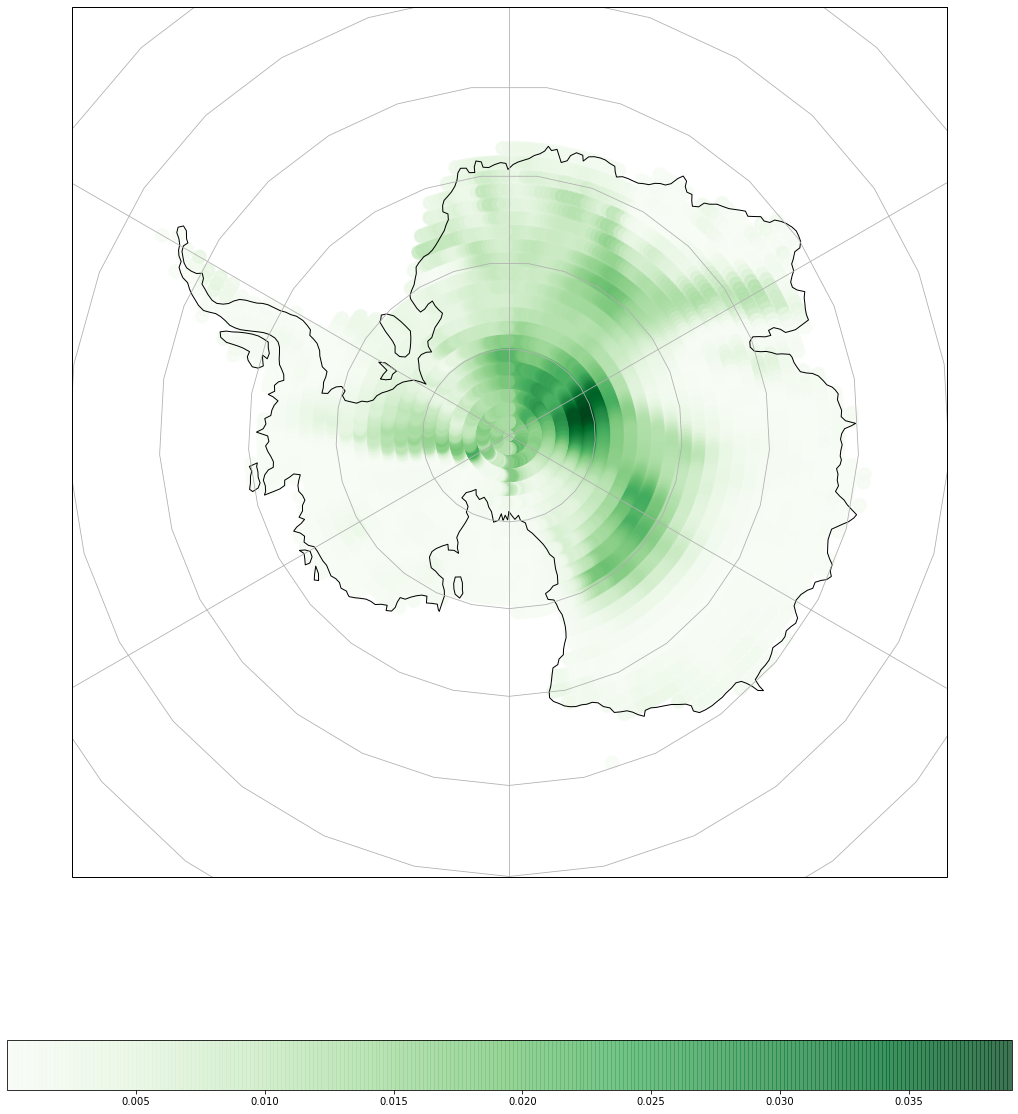

In [110]:
accumDvar = np.array(pd.read_csv('B1dVar.csv'))[:, 0]
tempDvar = np.array(pd.read_csv('B2dVar.csv'))[:, 0]


ax = plt.axes(projection=ccrs.SouthPolarStereo())


ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax.gridlines()

plt.rcParams['figure.figsize'] = [20, 20]



plt.scatter(lonLand, latLand, c=tempDvar, s=140, cmap=plt.cm.Greens, linewidth=3, alpha=0.75, zorder=1, transform=ccrs.PlateCarree())
plt.colorbar(orientation="horizontal", fraction=0.05, shrink=0.9)

ax.coastlines()

plt.show()

In [125]:
mask = np.array(pd.read_csv('IceShelfMask.csv'))[:, 0]

for i in range(5794):
    print(latLand[i])
        

-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.

In [129]:
#ERA5
allEra = nc.Dataset("era5total.nc")
print(allEra)

tasBase = np.array(allEra.variables['t2m'][:540, 0])
prBase = np.array(allEra.variables['tp'][:540, 0])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2024-09-02 23:23:00 GMT by grib_to_netcdf-2.24.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/tmp/f14895ea-8587-43e8-933c-b1cbf41f5be8-adaptor.mars.internal-1725319342.0125837-31134-2-tmp.nc /cache/tmp/f14895ea-8587-43e8-933c-b1cbf41f5be8-adaptor.mars.internal-1725319054.5822315-31134-1-tmp.grib
    dimensions(sizes): longitude(3600), latitude(301), expver(2), time(547)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 expver(expver), int32 time(time), int16 t2m(time,expver,latitude,longitude), int16 tp(time,expver,latitude,longitude)
    groups: 



In [145]:
eraTemps = np.zeros([45, 301, 3600])
eraAccums = np.zeros([45, 301, 3600])

for i in range(45):
    eraTemps[i] = np.mean(tasBase[(i*12):(i*12+12)], axis=0)
    eraAccums[i] = np.mean(prBase[(i*12):(i*12+12)], axis=0)

In [147]:
print(eraTemps[:, 0])

[[-32767. -32767. -32767. ... -32767. -32767. -32767.]
 [-32767. -32767. -32767. ... -32767. -32767. -32767.]
 [-32767. -32767. -32767. ... -32767. -32767. -32767.]
 ...
 [-32767. -32767. -32767. ... -32767. -32767. -32767.]
 [-32767. -32767. -32767. ... -32767. -32767. -32767.]
 [-32767. -32767. -32767. ... -32767. -32767. -32767.]]


[[-32767.         -32767.         -32767.         ... -32767.
  -32767.         -32767.        ]
 [-32767.         -32767.         -32767.         ... -32767.
  -32767.         -32767.        ]
 [-32767.         -32767.         -32767.         ... -32767.
  -32767.         -32767.        ]
 ...
 [   227.29414231    227.29434524    227.29414231 ...    227.29201152
     227.29251885    227.29353351]
 [   227.29505551    227.29485258    227.29464964 ...    227.29373645
     227.29373645    227.29485258]
 [   227.52071691    227.52071691    227.52071691 ...    227.52071691
     227.52071691    227.52071691]]


In [148]:
print(prLand[0])

[64.89291569 55.22369529 60.78425144 ... 60.0790048  62.25679784
 67.37791617]


In [154]:
mask = np.array(pd.read_csv('IceShelfMask.csv'))[:, 0]

print(mask.shape)
        

(288,)


In [167]:
maskedTemps = np.zeros([5244, 1001])
maskedAccum = np.zeros([5244, 1001])
maskedLats = np.zeros([5244])
maskedLons = np.zeros([5244])
counter = 0

for i in range(5794):
    lonIndex = int(lonLand[i] / 1.25)
    maxLat = mask[lonIndex]
    
    if latLand[i] <= maxLat:
        maskedTemps[counter] = tasLand[i]
        maskedAccum[counter] = prLand[i]
        maskedLats[counter] = latLand[i]
        maskedLons[counter] = lonLand[i]
        counter = counter + 1
        
        


In [164]:
print(maskedTemps)

[[225.78297424 227.06445312 226.97184753 ... 225.11981201 225.65739441
  226.27929688]
 [225.62904358 226.8261261  226.89277649 ... 225.12580872 225.63397217
  226.28271484]
 [225.59643555 226.81367493 226.86277771 ... 225.11961365 225.62475586
  226.27619934]
 ...
 [258.88537598 255.67584229 260.17456055 ... 256.29626465 257.51358032
  255.78038025]
 [259.03607178 256.04263306 259.9730835  ... 256.79269409 257.75213623
  256.41604614]
 [260.11813354 256.85043335 261.1723938  ... 257.51660156 258.80734253
  256.80810547]]


In [166]:
proxyDic2 = {"Ye": maskedAccum}
savemat("AccumMMEMasked.mat", proxyDic2)

[1252]


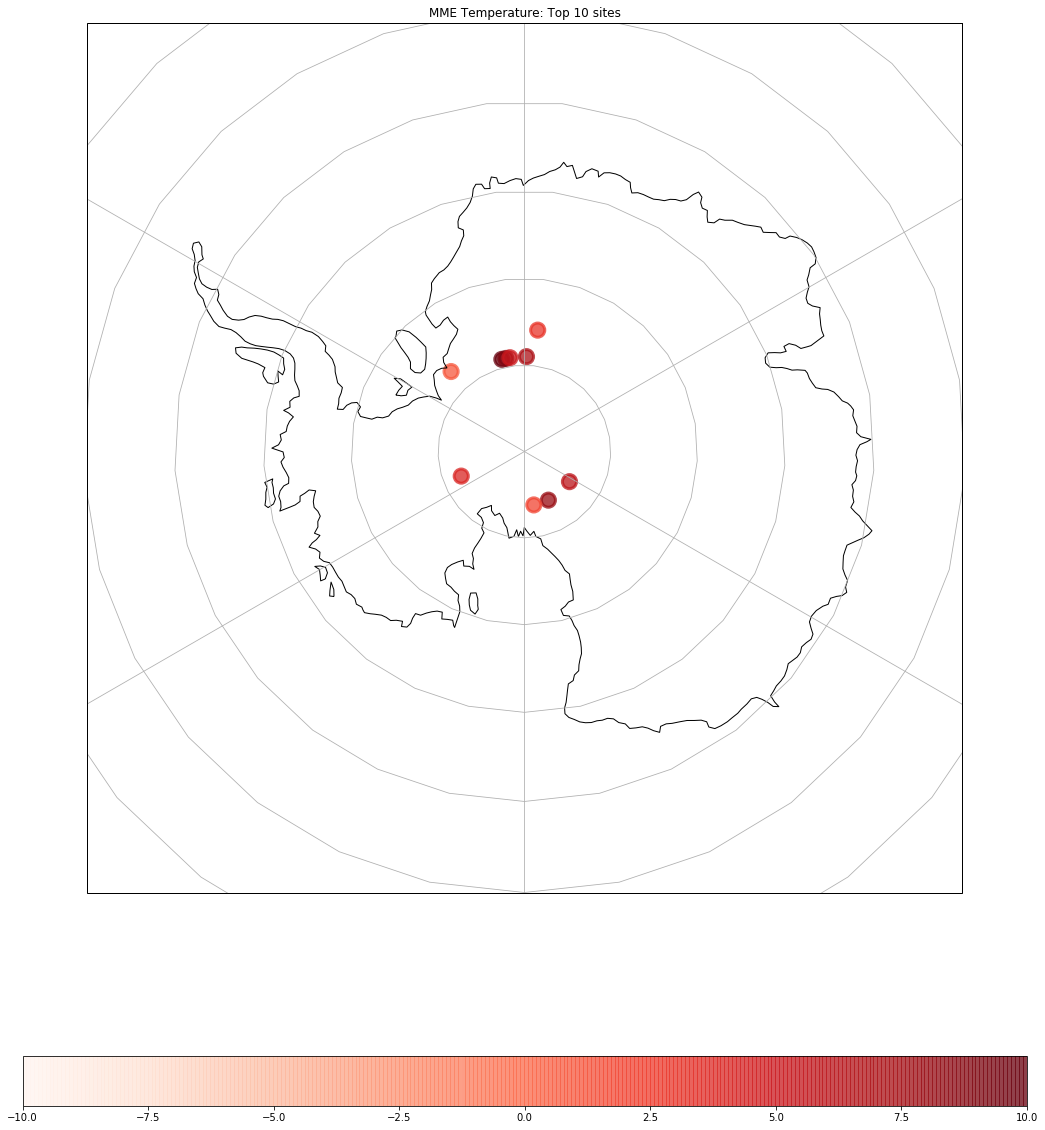

In [172]:
rank = np.array(pd.read_csv('D2.csv'))
sites = np.array(pd.read_csv('Sites.csv'))

print(rank[4])

numSites = 10

topLats = np.zeros([numSites])
topLons = np.zeros([numSites])


#ACCUM
for i in range(numSites):
    topLats[i] = latLand[rank[i]-1]
    topLons[i] = lonLand[rank[i]-1]


#TEMP
"""
for i in range(8):
    topLats[i] = latLand[rank[i]-1]
    topLons[i] = lonLand[rank[i]-1]
    
for i in range(2):
    topLats[i+8] = latLand[rank[i]]
    topLons[i+8] = lonLand[rank[i]]
"""
    


t = numSites - np.arange(numSites)

ax = plt.axes(projection=ccrs.SouthPolarStereo())


ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax.gridlines()

plt.rcParams['figure.figsize'] = [20, 20]



plt.scatter(topLons, topLats, c=t, s=200, linewidth=3, alpha=0.75, cmap=plt.cm.Reds, vmin=-10, vmax=10, zorder=1, transform=ccrs.PlateCarree())
plt.colorbar(orientation="horizontal", fraction=0.05, shrink=0.9, cmap=plt.cm.Reds)
#plt.scatter(sites[:, 1], sites[:, 0], c='blue', s=50, linewidth=3, alpha=0.25, zorder=1, transform=ccrs.PlateCarree())
#plt.colorbar(orientation="horizontal", fraction=0.05, shrink=0.9)
plt.title("MME Temperature: Top 10 sites")

ax.coastlines()

plt.show()